In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules



import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("D:\ExcelR Data Science\Assignments\Assciation Rules\my_movies.csv")
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
df=df.drop(['V1','V2','V3','V4','V5'],axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [5]:
df.shape

(10, 10)

In [6]:
# Building the model
frq_items = apriori(df, min_support = 0.05, use_colnames = True)
print(frq_items)
  


    support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Gladiator, Sixth Sense)
11      0.1                               (LOTR1, Sixth Sense)
12      0.1                       (Harry Potter1, Sixth Sense)
13      0.4                             (Patriot, Sixth Sense)
14      0.1                               (LOTR2, Sixth

In [7]:
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 0.5)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

                              antecedents              consequents  \
108               (Gladiator, Green Mile)                   (LOTR)   
109                                (LOTR)  (Gladiator, Green Mile)   
139  (Gladiator, Green Mile, Sixth Sense)                   (LOTR)   
142                   (LOTR, Sixth Sense)  (Gladiator, Green Mile)   
143               (Gladiator, Green Mile)      (LOTR, Sixth Sense)   

     antecedent support  consequent support  support  confidence  lift  \
108                 0.1                 0.1      0.1         1.0  10.0   
109                 0.1                 0.1      0.1         1.0  10.0   
139                 0.1                 0.1      0.1         1.0  10.0   
142                 0.1                 0.1      0.1         1.0  10.0   
143                 0.1                 0.1      0.1         1.0  10.0   

     leverage  conviction  zhangs_metric  
108      0.09         inf            1.0  
109      0.09         inf            1.0  
139  

In [8]:
rules.shape

(250, 10)

###  Visulazations

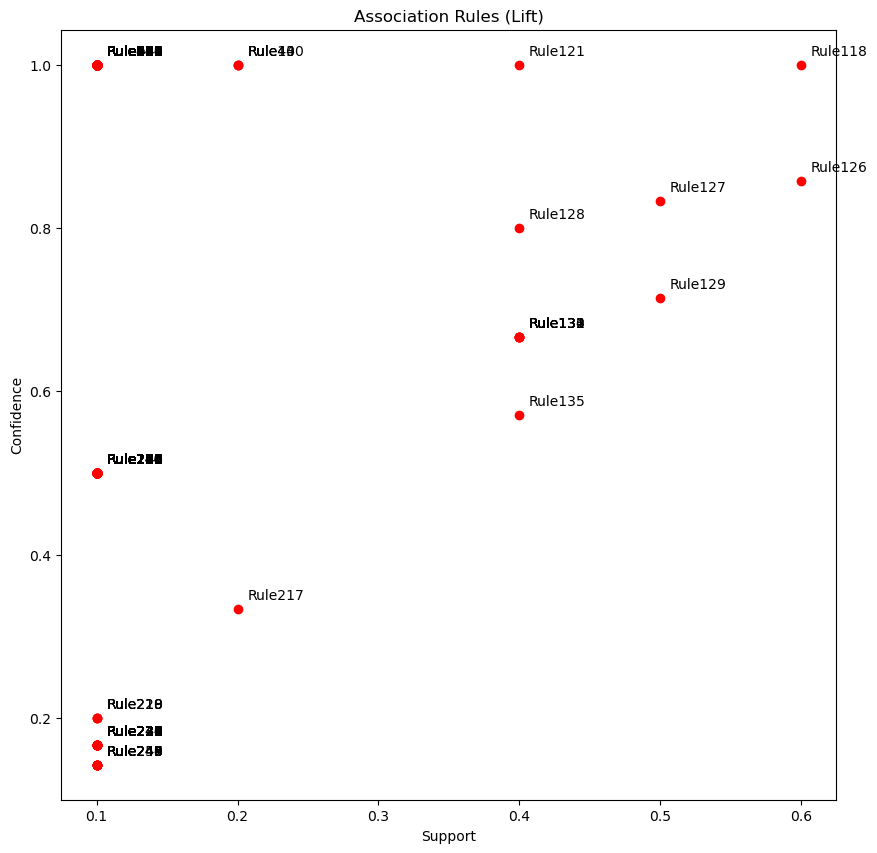

In [9]:
# Scatter PLot

# Extract the relevant metrics from association rules
support = rules['support'].values
confidence = rules['confidence'].values

# Create a scatter plot
plt.figure(figsize=(10,10))
plt.scatter(support, confidence, marker='o', c='red')

# Add labels to the data points
for i in range(len(rules)):
    plt.annotate('Rule{}'.format(i+1), (support[i], confidence[i]), textcoords="offset points", xytext=(7,7), ha='left')

# Set x-axis and y-axis labels
plt.xlabel('Support')
plt.ylabel('Confidence')

# Set plot title
plt.title('Association Rules (Lift)')

# Display the scatter plot
plt.show()


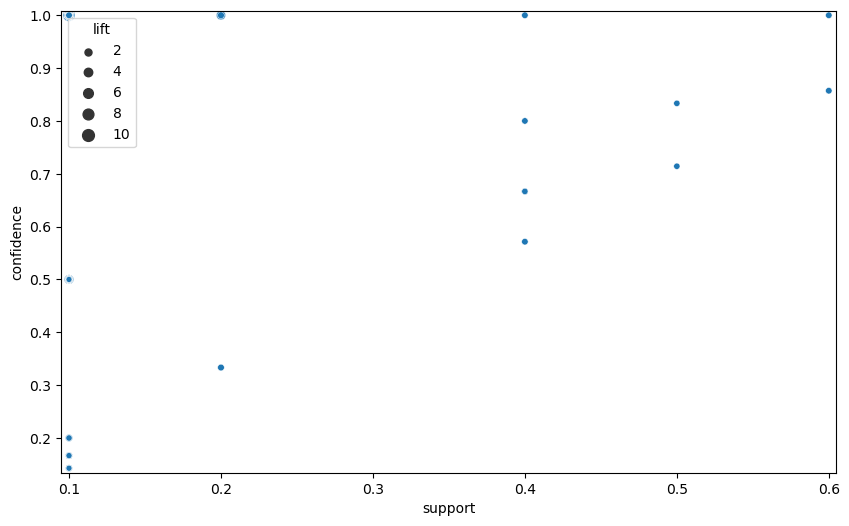

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.margins(0.01,0.01)
plt.show()

### Parellel coodrinates to visualize Association rule

In [11]:
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

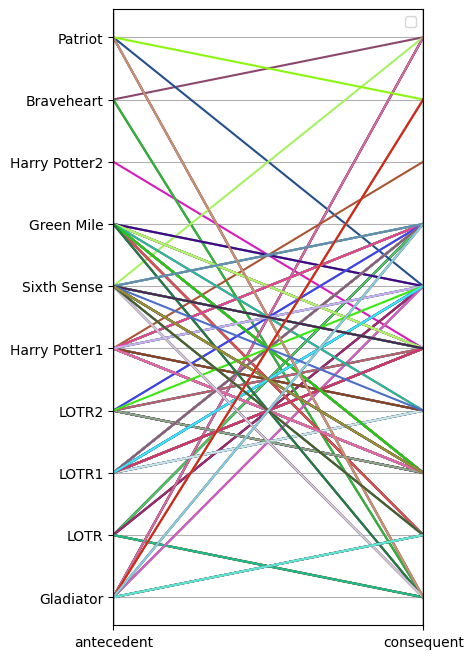

In [12]:
from pandas.plotting import parallel_coordinates


# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules)

# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(True)
plt.show()

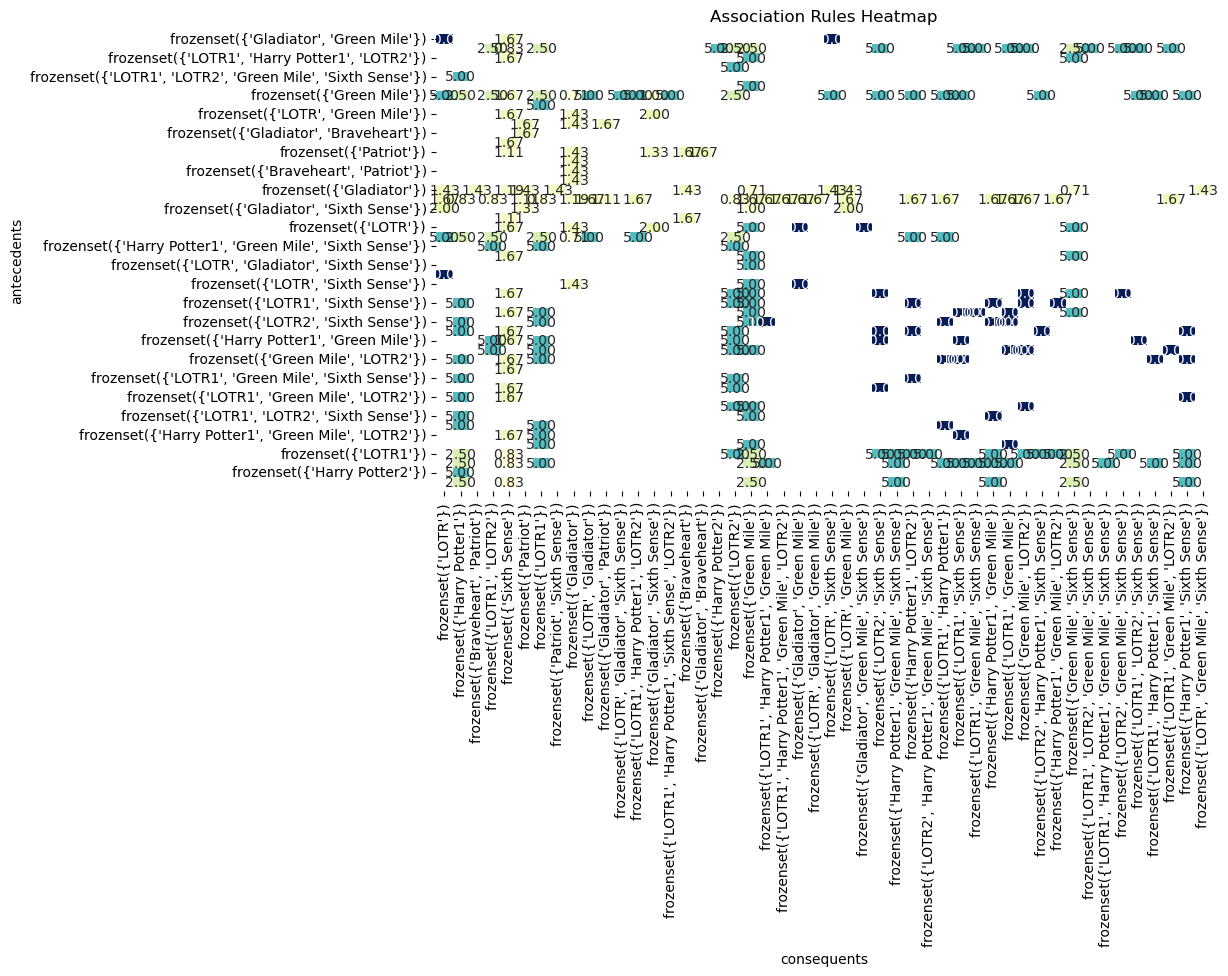

In [13]:
# Heat MAP Visualization
# Create a matrix of association rules with desired metric
rules_matrix = rules.pivot(index='antecedents', columns='consequents', values='lift')

# Create a heatmap of association rules
plt.figure(figsize=(10,6))

sns.heatmap(rules_matrix, cmap='YlGnBu', annot=True, fmt=".2f",cbar=False)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)

# Set plot title
plt.title('Association Rules Heatmap')

# Display the heatmap
plt.show()

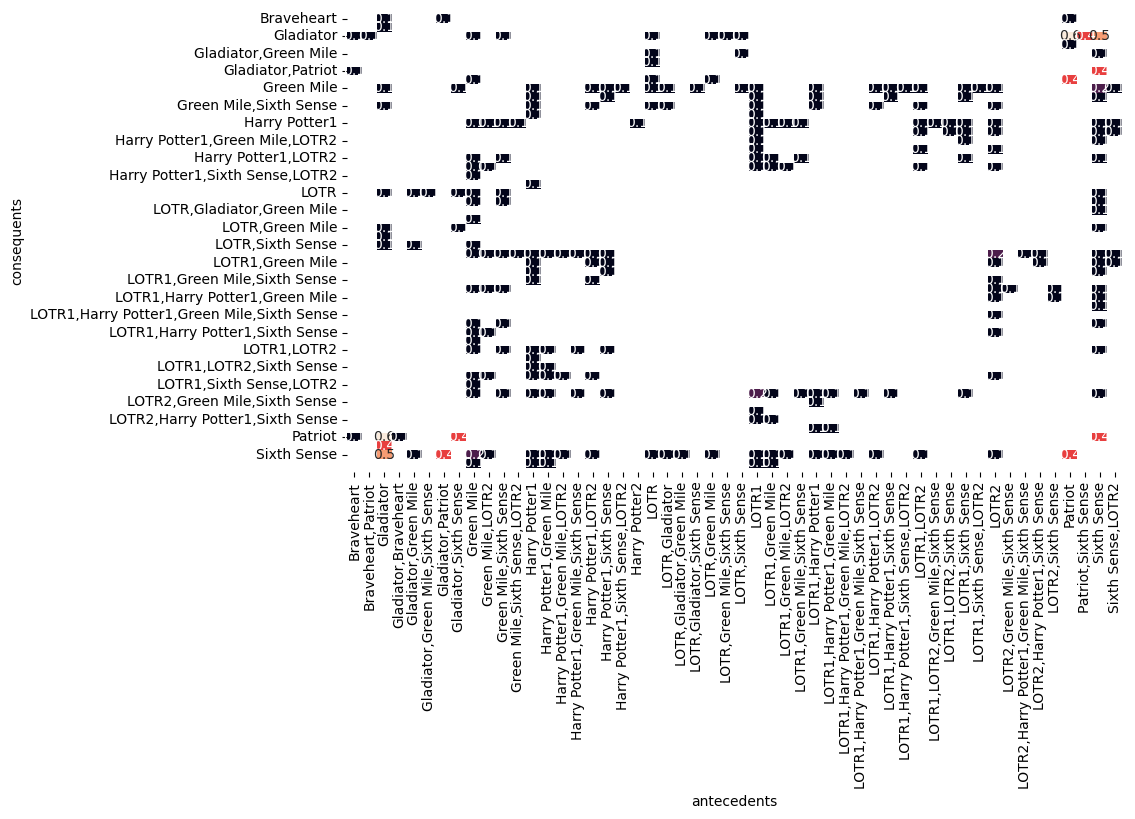

In [14]:
# Convert antecedents and consequents into strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = rules.pivot(index='consequents', columns='antecedents', values='support')

plt.figure(figsize=(10,6))
sns.heatmap(support_table, annot=True, cbar=False)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.show() 

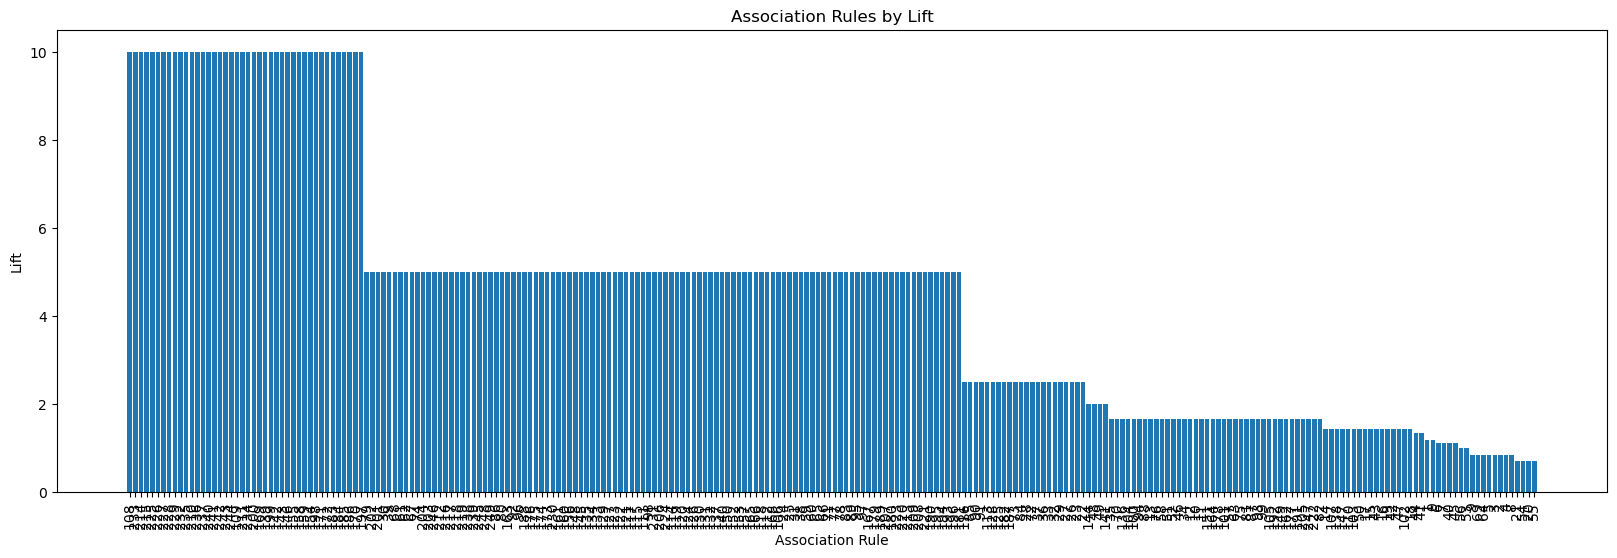

In [15]:

# Extract the metric of interest from association rules
metric = "lift"
rules_metric = rules[metric]

# Sort rules by the metric in descending order
sorted_rules = rules.sort_values(by=metric, ascending=False)

# Create a bar chart
plt.figure(figsize=(20, 6))  # Set the figure size
plt.bar(range(len(sorted_rules)), sorted_rules[metric], tick_label=sorted_rules.index)  # Create the bar chart
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Association Rule')  # Set x-axis label
plt.ylabel(metric.capitalize())  # Set y-axis label
plt.title('Association Rules by {}'.format(metric.capitalize()))  # Set plot title

# Display the bar chart
plt.show()


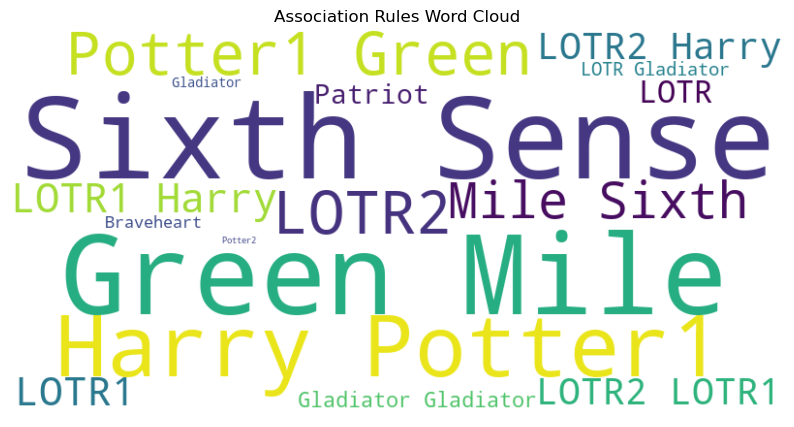

In [16]:
from wordcloud import WordCloud


# Concatenate antecedents and consequents of association rules
words = ' '.join(rules['antecedents'].astype(str).tolist() + rules['consequents'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(words)

# Create a plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.imshow(wordcloud, interpolation='bilinear')  # Show the word cloud
plt.axis('off')  # Turn off axis labels
plt.title('Association Rules Word Cloud')  # Set the plot title

# Display the word cloud
plt.show()


### Newwork Graph

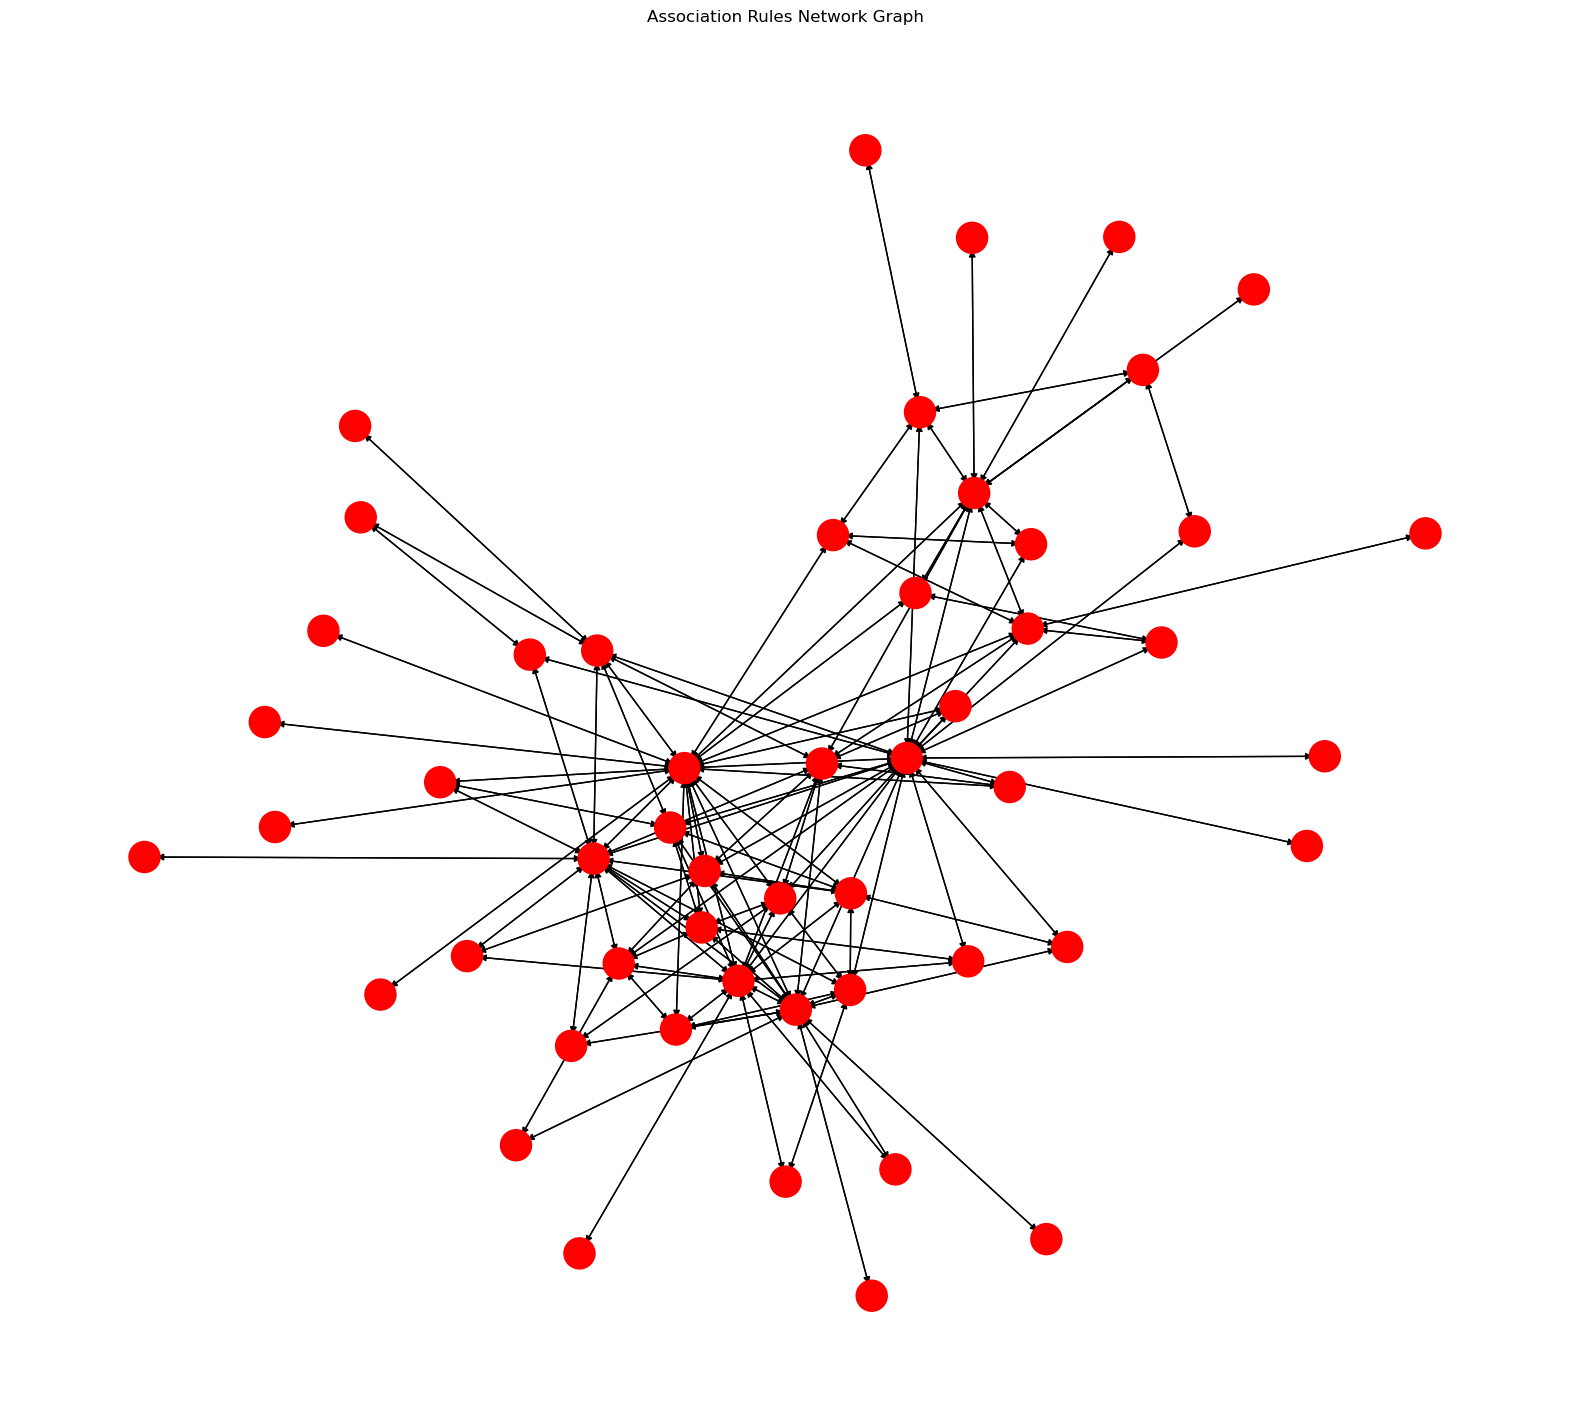

In [17]:
import networkx as nx


# Create a directed graph
G = nx.DiGraph()

# Add nodes for antecedents and consequents of association rules
G.add_nodes_from(rules['antecedents'], color='blue', label='antecedent')
G.add_nodes_from(rules['consequents'], color='red', label='consequent')

# Add edges between antecedents and consequents based on association rules
for i in range(len(rules)):
    G.add_edge(rules['antecedents'][i], rules['consequents'][i])

plt.figure(figsize=(20,18))

# Set node positions using a spring layout algorithm
pos = nx.spring_layout(G)

# Draw nodes and edges with labels and colors
nx.draw_networkx_nodes(G, pos, node_color=[node[1]['color'] for node in G.nodes(data=True)], node_size=500)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels={node[0]: node[0] for node in G.nodes(data=True) if node[1]['label'] == 'antecedent'})

# Set plot title and display the network graph
plt.title('Association Rules Network Graph')
plt.axis('off')  # Turn off axis labels
plt.show()


In [18]:
g_rules=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents',edge_attr='support')

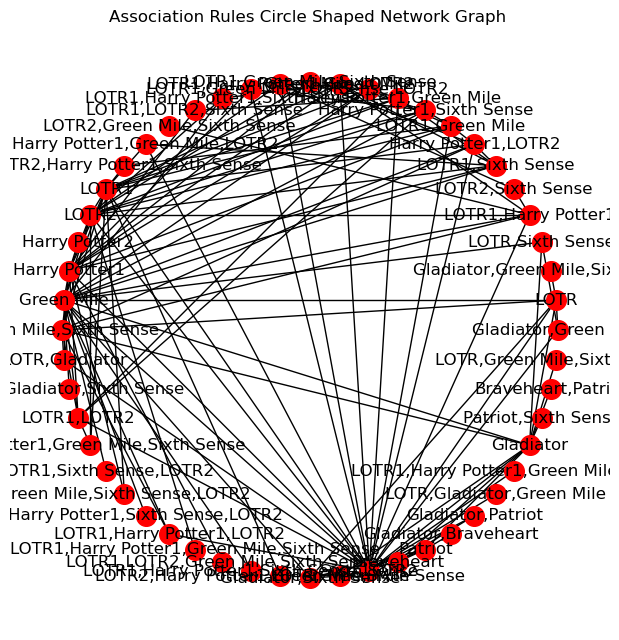

In [19]:
plt.figure(figsize=(6,6))
nx.draw_circular(g_rules,node_color='red',edge_color='black',with_labels=True,node_size=200)
plt.title('Association Rules Circle Shaped Network Graph ')
plt.show()

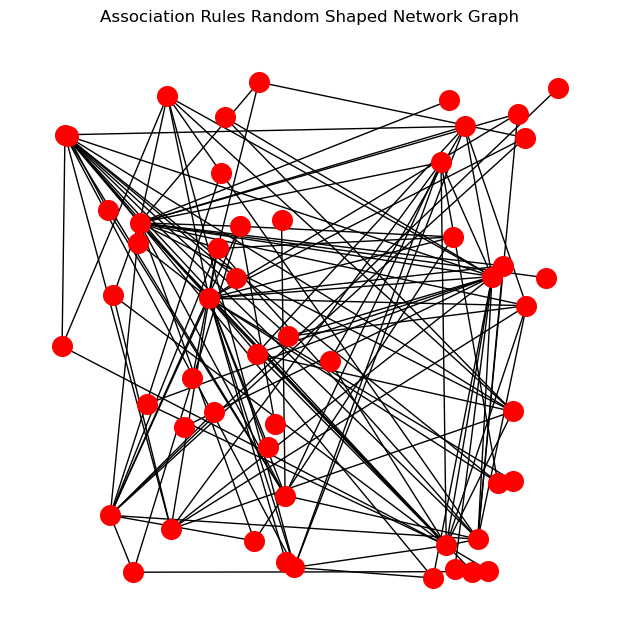

In [20]:
plt.figure(figsize=(6,6))
nx.draw_random(g_rules,node_color='red',edge_color='black',with_labels=False,node_size=200)
plt.title('Association Rules Random Shaped Network Graph')
plt.show()